## Objective: Perform Exploratory Data Analysis on the dataset, 'global terrorism'

#### Name:Srikar R

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df1 = pd.read_csv('C:\\Users\\Srikar\\GlobalTerrorism.csv',encoding ='ISO-8859-1', low_memory=False)


The dataset contains the following variables: Ship Mode,Segment,Country,Cit,State,Postal Code,Region	Category,Sub-Category,Sales,Quantity,Discount,Profit

In [4]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Columns: 135 entries, eventid to related
dtypes: float64(55), int64(22), object(58)
memory usage: 187.1+ MB


The dataset contains 135 Variables whic are of different types that include object, integer and float

We can see the the different summary statistics of the variables that are of integer and float type

In [5]:
df = df1[['eventid', 'iyear','country_txt', 'region_txt', 'provstate', 'city', 'crit1', 'crit2', 'crit3', 
                  'success', 'suicide', 'attacktype1_txt', 'targtype1_txt', 'natlty1_txt','gname', 'guncertain1', 
                  'claimed', 'weaptype1_txt', 'nkill','nwound']]

Keeping only the data that is required for EDA

In [6]:
df.describe()      #Summary Stats

,eventid,iyear,crit1,crit2,crit3,success,suicide,guncertain1,claimed,nkill,nwound
count,1.816910e+05,181691.000000,181691.000000,181691.000000,181691.000000,181691.000000,181691.000000,181311.000000,115571.000000,171378.000000,165380.000000
mean,2.002705e+11,2002.638997,0.988530,0.993093,0.875668,0.889598,0.036507,0.081440,0.049666,2.403272,3.167668
std,1.325957e+09,13.259430,0.106483,0.082823,0.329961,0.313391,0.187549,0.273511,1.093195,11.545741,35.949392
min,1.970000e+11,1970.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-9.000000,0.000000,0.000000
25%,1.991021e+11,1991.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2.009022e+11,2009.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,2.014081e+11,2014.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,2.000000,2.000000
max,2.017123e+11,2017.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1570.000000,8191.000000


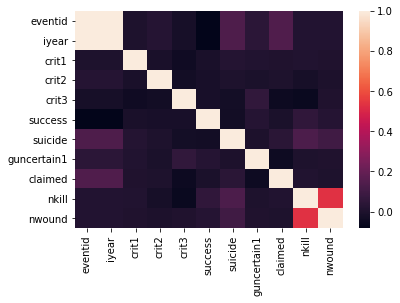

In [7]:
# Correlation Analysis

corr = df.corr()
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns)

Here are the following observations:

Large Correlations: Here nkill and nwound have the largest corrwlation as their value is bove 0.5

Small Correlations are Event iD and success

The following plot shows all the scatterplots with respect to all the variables. This also helps us understand the correcelation and helps us to visualize it better

### Top 20 terroist attacked countries

In [8]:
t20 = df.country_txt.value_counts().head(20)
countries = list(t20.index)

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19],
 <a list of 20 Text xticklabel objects>)

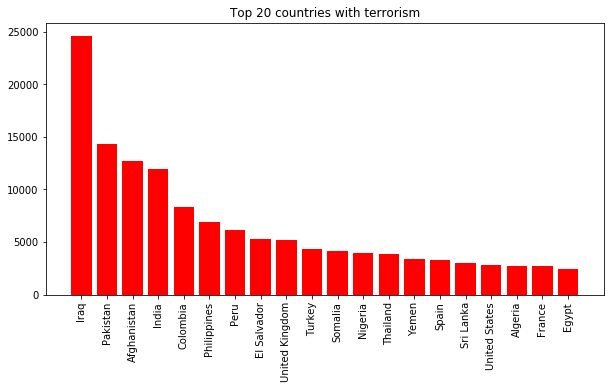

In [10]:
fig, ax = plt.subplots(figsize=(10,5))
ax.bar(t20.index,t20.values,color='r')
plt.title('Top 20 countries with terrorism')
plt.xticks(rotation=90)

The following countries have the highest terrorism out of the 135 countries given in the dataset

### Terrorist activity

Text(0.5, 1.0, 'Terrorist activity ')

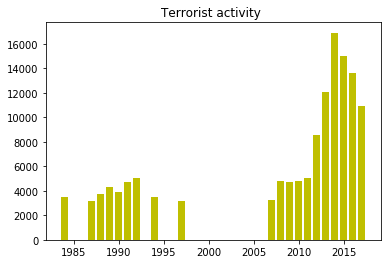

In [15]:
years = df.iyear.value_counts().head(20)
plt.bar(years.index,years.values,color='y')
plt.title("Terrorist activity ")

We can see that most terrorist activities happened between te year 2007-2015. There wasn't any terrorist activity between 
1997 and 2007

### Finding the catergory of targets

In [27]:
target = df['targtype1_txt'].value_counts().head()
target

Private Citizens & Property    43511
Military                       27984
Police                         24506
Government (General)           21283
Business                       20669
Name: targtype1_txt, dtype: int64

Text(0.5, 1.0, 'Category of Targets')

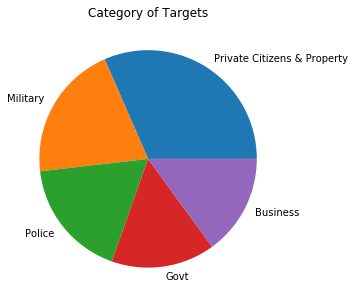

In [28]:
labels = ['Private Citizens & Property','Military','Police','Govt','Business']
fig,ax = plt.subplots(figsize=(10,5))
ax.pie(target.values,labels=labels)
plt.title('Category of Targets')



We can observe that Private Citizens is the highest category of targets and the lowest if Government.

### Weaponary used

Text(0.5, 1.0, 'Weapons Used')

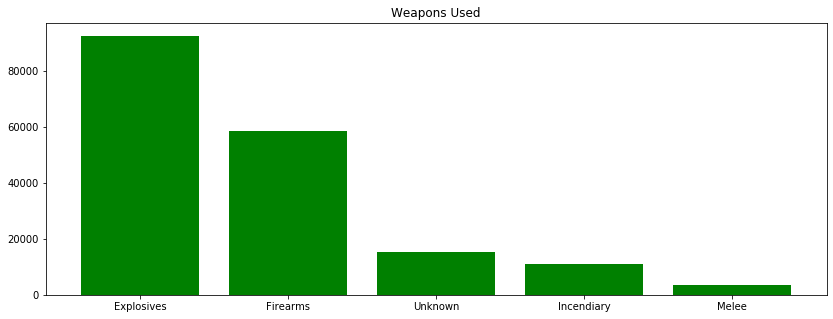

In [31]:
WT = df['weaptype1_txt'].value_counts().head(5)
fig,ax = plt.subplots(figsize=(14,5))
ax.bar(WT.index,WT.values,color='g')
plt.title('Weapons Used')

### Type of terrorist attack

In [45]:
TA=df['attacktype1_txt'].value_counts().head(5)
TA

Bombing/Explosion                 88255
Armed Assault                     42669
Assassination                     19312
Hostage Taking (Kidnapping)       11158
Facility/Infrastructure Attack    10356
Name: attacktype1_txt, dtype: int64

Text(0.5, 1.0, 'Type of terrorist attack')

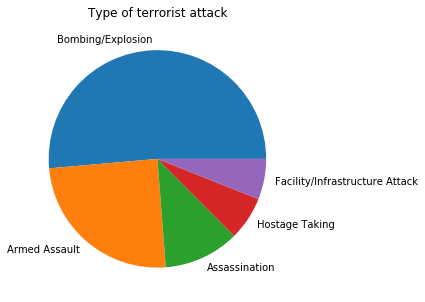

In [41]:
labels = ['Bombing/Explosion','Armed Assault','Assassination','Hostage Taking','Facility/Infrastructure Attack']
fig,ax = plt.subplots(figsize=(10,5))
ax.pie(TA.values,labels=labels)
plt.title('Type of terrorist attack')



Most terrorist attacks have involves bombing/explosion and least terroist attacks are facility attacks.

### Finding the damage done by terroism in the top 20 countries

In [52]:
df['Damage']=df['nkill']+df['nwound']


C:\Users\Srikar\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [57]:
t20 = df.country_txt.value_counts().head(20)
countries = list(t20.index)
Dam= df.Damage.value_counts().head(20)

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19],
 <a list of 20 Text xticklabel objects>)

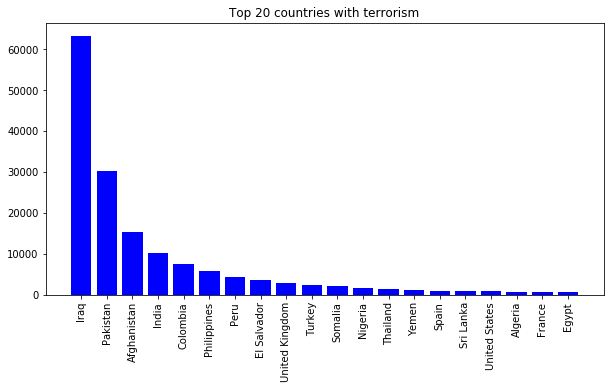

In [82]:
fig, ax = plt.subplots(figsize=(10,5))
ax.bar(t20.index,Dam.values,color='b')
plt.title('Top 20 countries with terrorism')
plt.xticks(rotation=90)

### Top weapons and the damage done

In [71]:
WT = df['weaptype1_txt'].value_counts().head(5)
Dam1= df.Damage.value_counts().head(5)

In [76]:
WD=[WT,Dam1]
WD

[Explosives    92426
 Firearms      58524
 Unknown       15157
 Incendiary    11135
 Melee          3655
 Name: weaptype1_txt, dtype: int64,
 0.0    63297
 1.0    30157
 2.0    15278
 3.0    10273
 4.0     7549
 Name: Damage, dtype: int64]

([0, 1, 2, 3, 4], <a list of 5 Text xticklabel objects>)

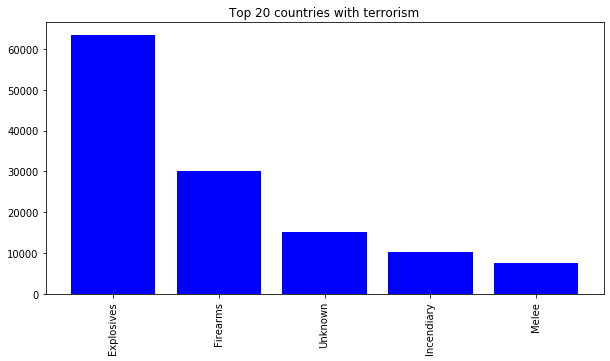

In [73]:
fig, ax = plt.subplots(figsize=(10,5))
ax.bar(WT.index,Dam1.values,color='b')
plt.title('Weapons and their damage caused')
plt.xticks(rotation=90)

### Interpretation

The following interpretations can be made from the data analysis above:

1) The reason for why there is high terrorism in Irag and Afghanistan must be found out. Pakistan and India are also hot zones for terroism attacks

2) The amount of terroist attacks surged after 2010 and was at its peak in 2015. There was time from 1997 to 2010 where there were few or no attacks itself

3) Most kills and injuries include citizens and their property. After this, the military and the police are targeted. There should be a way to increase safety for this.

4) Access to explosives and fireamrs which are the leading cause of the kills and wounds must be stopped. Bombing explosions and armed assualuts are leading reasons in most countries. Access to these items must be prevented.